# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
loan=pd.read_csv('loan_data.csv')
loan.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [3]:
loan.shape

(9578, 14)

In [4]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loan.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

# Exploratory data analysis of different factors of the dataset.

In [6]:
loan['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

<AxesSubplot:xlabel='credit.policy', ylabel='count'>

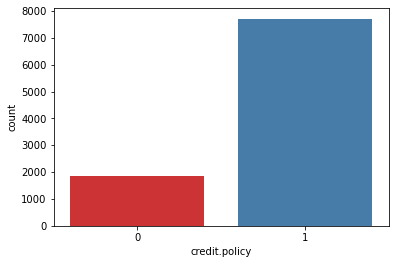

In [7]:
sns.countplot(x='credit.policy',data=loan,palette='Set1')

In [8]:
loan['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

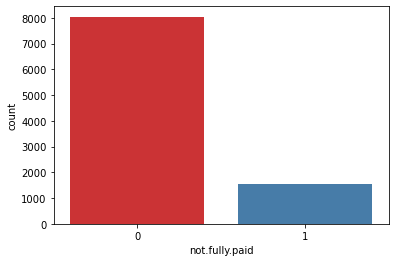

In [9]:
sns.countplot(x='not.fully.paid',data=loan,palette='Set1')

Text(0.5, 0, 'FICO')

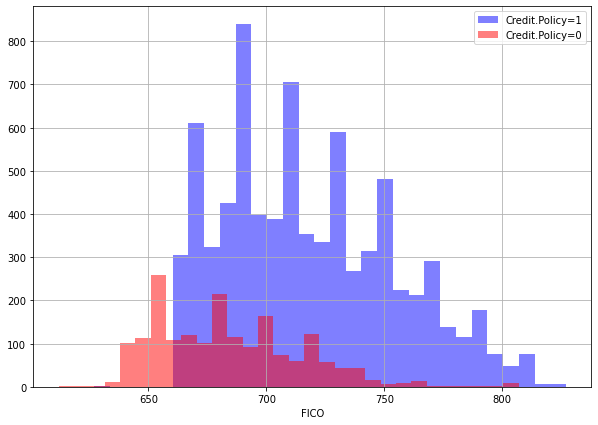

In [10]:
plt.figure(figsize=(10,7))
loan[loan['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
loan[loan['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

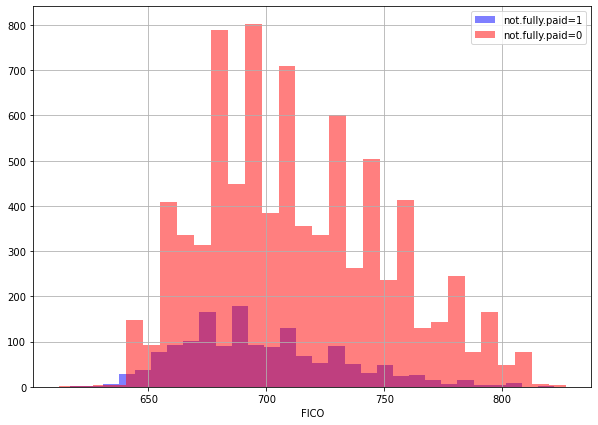

In [11]:
plt.figure(figsize=(10,7))
loan[loan['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
loan[loan['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

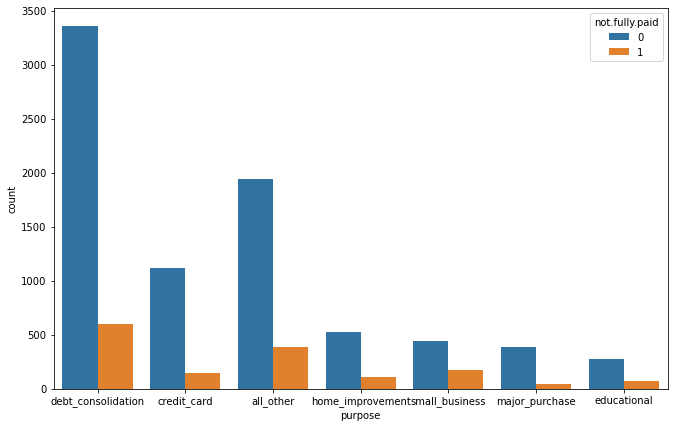

In [12]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loan)

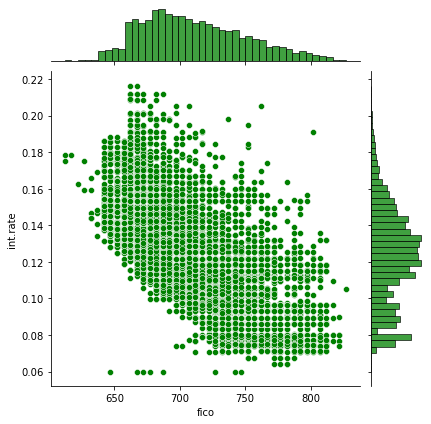

In [13]:
sns.jointplot(x='fico',y='int.rate',data=loan,color='green')

<Figure size 864x432 with 0 Axes>

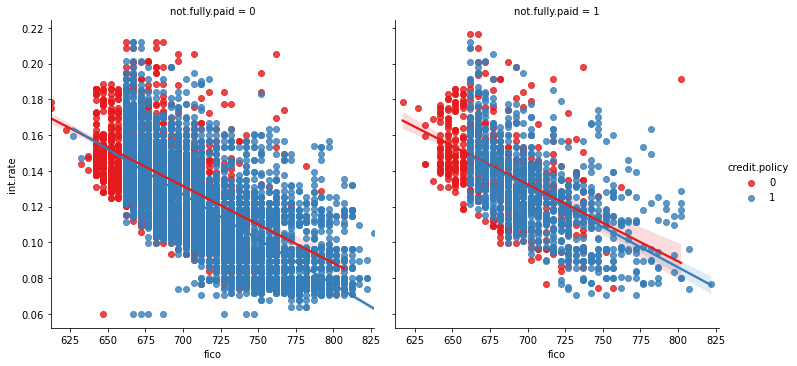

In [14]:
plt.figure(figsize=(12,6))
sns.lmplot(x='fico',y='int.rate',data=loan,hue='credit.policy',col='not.fully.paid',palette='Set1')

# Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features



<AxesSubplot:>

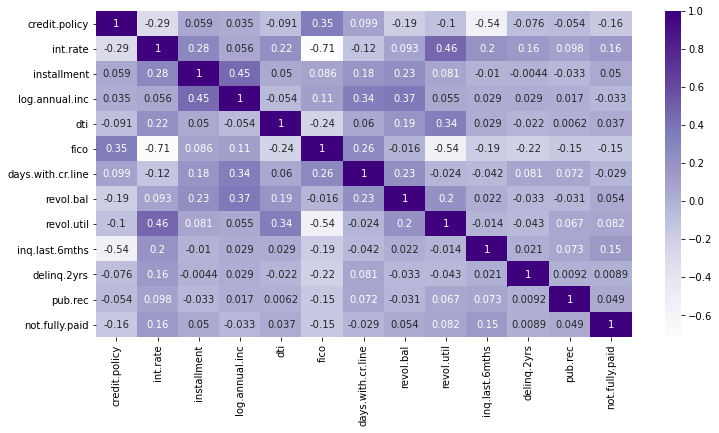

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(loan.corr(),annot=True,cmap='Purples')

In [16]:
loan.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


# Feature Transformation

Transform categorical values into numerical values (discrete)

In [17]:
loan['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [18]:
loan=pd.get_dummies(data=loan,columns=['purpose'])
loan

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


In [19]:
x=loan.drop(['not.fully.paid'],axis=1)

In [20]:
x.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [21]:
y=loan['not.fully.paid']
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

#  Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [23]:
ms=MinMaxScaler()

In [24]:
x_train=ms.fit_transform(x_train)
x_test=ms.fit_transform(x_test)

In [25]:
model=Sequential()
model.add( Dense(19, activation='relu'))
model.add( Dense(10, activation='relu'))
model.add( Dense(5, activation='relu'))
model.add( Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200,batch_size=256)

Epoch 1/200
27/27 [==============================] - 0s 7ms/step - loss: 0.6870 - accuracy: 0.5944 - val_loss: 0.6301 - val_accuracy: 0.8271
Epoch 2/200
27/27 [==============================] - 0s 3ms/step - loss: 0.5810 - accuracy: 0.8420 - val_loss: 0.5248 - val_accuracy: 0.8347
Epoch 3/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.8422 - val_loss: 0.4580 - val_accuracy: 0.8347
Epoch 4/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.8422 - val_loss: 0.4517 - val_accuracy: 0.8347
Epoch 5/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.8422 - val_loss: 0.4442 - val_accuracy: 0.8347
Epoch 6/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.8422 - val_loss: 0.4383 - val_accuracy: 0.8347
Epoch 7/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.8422 - val_loss: 0.4355 - val_accuracy: 0.8347
Epoch 8/200
2

Epoch 59/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8447 - val_loss: 0.4288 - val_accuracy: 0.8312
Epoch 60/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8450 - val_loss: 0.4293 - val_accuracy: 0.8316
Epoch 61/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8452 - val_loss: 0.4294 - val_accuracy: 0.8309
Epoch 62/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.8456 - val_loss: 0.4289 - val_accuracy: 0.8316
Epoch 63/200
27/27 [==============================] - 0s 3ms/step - loss: 0.3989 - accuracy: 0.8458 - val_loss: 0.4289 - val_accuracy: 0.8305
Epoch 64/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8452 - val_loss: 0.4295 - val_accuracy: 0.8312
Epoch 65/200
27/27 [==============================] - 0s 3ms/step - loss: 0.3990 - accuracy: 0.8444 - val_loss: 0.4292 - val_accuracy: 0.8316
Epoch 

27/27 [==============================] - 0s 3ms/step - loss: 0.3968 - accuracy: 0.8473 - val_loss: 0.4306 - val_accuracy: 0.8295
Epoch 117/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8465 - val_loss: 0.4304 - val_accuracy: 0.8292
Epoch 118/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8468 - val_loss: 0.4309 - val_accuracy: 0.8285
Epoch 119/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.8462 - val_loss: 0.4311 - val_accuracy: 0.8312
Epoch 120/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8467 - val_loss: 0.4306 - val_accuracy: 0.8285
Epoch 121/200
27/27 [==============================] - 0s 3ms/step - loss: 0.3956 - accuracy: 0.8471 - val_loss: 0.4308 - val_accuracy: 0.8285
Epoch 122/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8470 - val_loss: 0.4309 - val_accuracy: 0.8305
Epoch 123/200

27/27 [==============================] - 0s 3ms/step - loss: 0.3933 - accuracy: 0.8470 - val_loss: 0.4338 - val_accuracy: 0.8281
Epoch 174/200
27/27 [==============================] - 0s 3ms/step - loss: 0.3932 - accuracy: 0.8465 - val_loss: 0.4337 - val_accuracy: 0.8285
Epoch 175/200
27/27 [==============================] - 0s 3ms/step - loss: 0.3933 - accuracy: 0.8462 - val_loss: 0.4345 - val_accuracy: 0.8299
Epoch 176/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.8474 - val_loss: 0.4335 - val_accuracy: 0.8295
Epoch 177/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8470 - val_loss: 0.4331 - val_accuracy: 0.8302
Epoch 178/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8468 - val_loss: 0.4339 - val_accuracy: 0.8285
Epoch 179/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8473 - val_loss: 0.4333 - val_accuracy: 0.8292
Epoch 180/200

<AxesSubplot:>

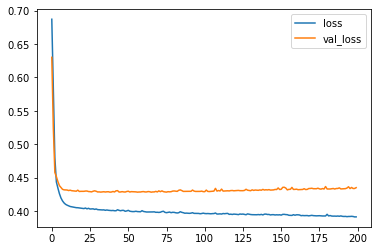

In [27]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot() 

In [28]:
model=Sequential()
model.add( Dense(19, activation='relu'))
model.add(Dropout(0.2))
model.add( Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add( Dense(5, activation='relu'))
model.add(Dropout(0.2))
model.add( Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200,batch_size=256)

Epoch 1/200
27/27 [==============================] - 0s 5ms/step - loss: 0.6733 - accuracy: 0.6183 - val_loss: 0.5942 - val_accuracy: 0.8347
Epoch 2/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5715 - accuracy: 0.8103 - val_loss: 0.5169 - val_accuracy: 0.8347
Epoch 3/200
27/27 [==============================] - 0s 2ms/step - loss: 0.5058 - accuracy: 0.8373 - val_loss: 0.4653 - val_accuracy: 0.8347
Epoch 4/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.8396 - val_loss: 0.4519 - val_accuracy: 0.8347
Epoch 5/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4756 - accuracy: 0.8416 - val_loss: 0.4490 - val_accuracy: 0.8347
Epoch 6/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4640 - accuracy: 0.8413 - val_loss: 0.4468 - val_accuracy: 0.8347
Epoch 7/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4615 - accuracy: 0.8417 - val_loss: 0.4442 - val_accuracy: 0.8347
Epoch 8/200
2

Epoch 59/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4240 - accuracy: 0.8422 - val_loss: 0.4291 - val_accuracy: 0.8347
Epoch 60/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8422 - val_loss: 0.4290 - val_accuracy: 0.8347
Epoch 61/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8422 - val_loss: 0.4289 - val_accuracy: 0.8347
Epoch 62/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4190 - accuracy: 0.8422 - val_loss: 0.4290 - val_accuracy: 0.8347
Epoch 63/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4178 - accuracy: 0.8422 - val_loss: 0.4289 - val_accuracy: 0.8347
Epoch 64/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.8422 - val_loss: 0.4287 - val_accuracy: 0.8347
Epoch 65/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8422 - val_loss: 0.4286 - val_accuracy: 0.8347
Epoch 

27/27 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8422 - val_loss: 0.4287 - val_accuracy: 0.8326
Epoch 117/200
27/27 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8428 - val_loss: 0.4284 - val_accuracy: 0.8330
Epoch 118/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4084 - accuracy: 0.8425 - val_loss: 0.4283 - val_accuracy: 0.8337
Epoch 119/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.8432 - val_loss: 0.4283 - val_accuracy: 0.8337
Epoch 120/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4079 - accuracy: 0.8440 - val_loss: 0.4283 - val_accuracy: 0.8330
Epoch 121/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4040 - accuracy: 0.8419 - val_loss: 0.4283 - val_accuracy: 0.8330
Epoch 122/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4049 - accuracy: 0.8431 - val_loss: 0.4285 - val_accuracy: 0.8333
Epoch 123/200

27/27 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8435 - val_loss: 0.4312 - val_accuracy: 0.8299
Epoch 174/200
27/27 [==============================] - 0s 3ms/step - loss: 0.3998 - accuracy: 0.8438 - val_loss: 0.4312 - val_accuracy: 0.8299
Epoch 175/200
27/27 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8444 - val_loss: 0.4314 - val_accuracy: 0.8299
Epoch 176/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4002 - accuracy: 0.8443 - val_loss: 0.4312 - val_accuracy: 0.8295
Epoch 177/200
27/27 [==============================] - 0s 3ms/step - loss: 0.3990 - accuracy: 0.8458 - val_loss: 0.4313 - val_accuracy: 0.8302
Epoch 178/200
27/27 [==============================] - 0s 3ms/step - loss: 0.4014 - accuracy: 0.8431 - val_loss: 0.4312 - val_accuracy: 0.8295
Epoch 179/200
27/27 [==============================] - 0s 3ms/step - loss: 0.3992 - accuracy: 0.8455 - val_loss: 0.4311 - val_accuracy: 0.8299
Epoch 180/200

<AxesSubplot:>

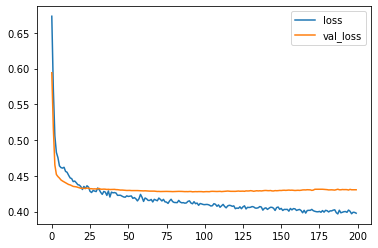

In [30]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot() 

In [31]:
predictions_new = (model.predict_proba(x_test) >= 0.2).astype('int')

print(
        confusion_matrix(y_test,predictions_new), 
        '\n', 
        classification_report(y_test,predictions_new)
)

Instructions for updating:
Please use `model.predict()` instead.
[[2010  389]
 [ 329  146]] 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      2399
           1       0.27      0.31      0.29       475

    accuracy                           0.75      2874
   macro avg       0.57      0.57      0.57      2874
weighted avg       0.76      0.75      0.76      2874

